# Visualization with Hierarchical Clustering and t-SNE

## Example of Hierarchical Clustering

Let's see an example of Hierarchical clustering: Eurovision Song Contest 2016

* Countries gave scores to songs performed
* 2D Array of scores
* Rows are countries, columns are songs eurovision_songs_array.jpg

![eurovision songs array](./images/eurovision_songs_array.jpg "eurovision songs array")

Hierarchical Clustering:

![eurovision voting clustering](./images/eurovision_voting_clustering.jpg "eurovision voting clustering")

## But how does Hierarchical CLustering form?

* Every country begins in a separate cluster
* At each step, the 2 closest clusters are merged
* Continue until all countries are in a single cluster

This is called "Agglomerative" hierarchical clustering.

## Let's get practical with the Eurovision dataset!

In [2]:
# starter code

import pandas as pd
import numpy as np
import warnings

pd.set_option('display.expand_frame_repr', False)

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
# Eurovision scoring dataset

scores_df = pd.read_csv("datasets/eurovision-2016-televoting.csv",index_col=0)
country_names = list(scores_df.index)
samples = scores_df.fillna(value=0).values

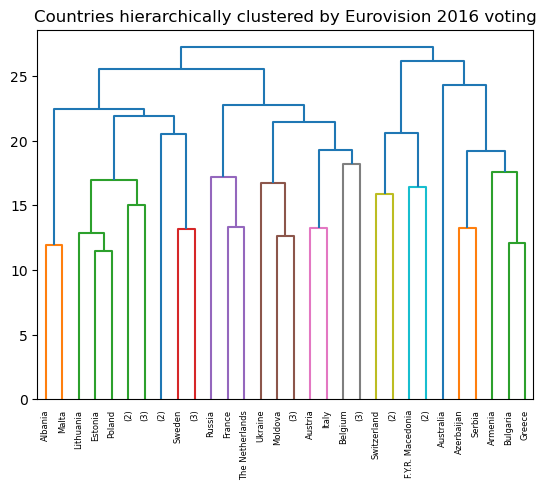

In [4]:
# Hierarchical clustering with SciPy

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

mergings = linkage(samples, method='complete')

dendrogram(mergings,labels=country_names,leaf_rotation=90,leaf_font_size=6,
          truncate_mode='lastp',p=30)

plt.title("Countries hierarchically clustered by Eurovision 2016 voting")
plt.show()

## Let's also see the Hierarchical CLustering on the Stocks dataset

In [5]:
# Stocks data

data = pd.read_csv("datasets/company-stock-movements-2010-2015-incl.csv")
companies = list(data.iloc[:,0])
movements = data.iloc[:,1:].values

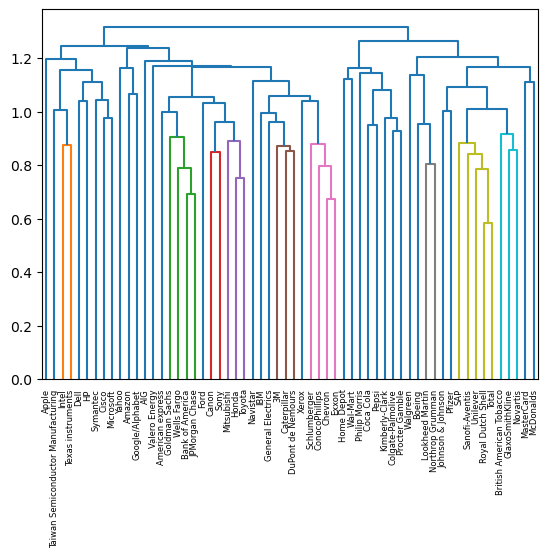

In [6]:
# Hierarchies of stocks

# Import normalize
from sklearn.preprocessing import normalize

# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method='complete')

# Plot the dendrogram
dendrogram(mergings, labels=companies, leaf_rotation=90, leaf_font_size=6)
plt.show()

### Cluster labels in hierarchical clustering

In [8]:
# Eurovision scoring dataset

scores_df = pd.read_csv("datasets/eurovision-2016-televoting.csv",index_col=0)
country_names = list(scores_df.index)
samples = scores_df.fillna(value=0).values

print(samples[:5])

[[ 2. 12.  0.  0.  0.  8.  0.  0.  0.  0.  0.  0.  1.  0. 10.  0.  4.  0.
   5.  7.  0.  0.  3.  0.  6.  0.]
 [ 0.  0.  4.  0.  0.  0.  0.  6.  0.  7.  8.  0.  3.  0.  0.  0.  0.  5.
   1. 12.  0.  0.  2.  0. 10.  0.]
 [ 0.  0.  3.  0. 12. 10.  0.  0.  0.  7.  0.  0.  0.  0.  0.  0.  1.  6.
   0.  5.  0.  2.  0.  0.  8.  4.]
 [ 0.  3.  0.  0.  0.  5.  0.  0.  0.  1.  0.  2.  0.  0.  0.  0.  0.  0.
  12.  8.  4.  0.  7.  6. 10.  0.]
 [ 0.  2.  0.  0.  0.  8.  0.  0.  0.  4.  1.  0.  7.  6.  0.  0.  0.  5.
   3. 12.  0.  0.  0.  0. 10.  0.]]


In [9]:
# Extracting cluster labels using fcluster

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import fcluster

mergings = linkage(samples, method='complete')

# Use fcluster to extract labels: labels
labels = fcluster(mergings, 15, criterion='distance')

print(labels)

[ 1 20 21 11 18  9 13 16 19 14 12  9  5  2 17  4  7  9  4 19  4  5  6 12
 11  3  2  1  9 16  6  2  8  3 18 14 12  6 15  7 10  6]


In [10]:
# Aligning cluster labels with country names

pairs = pd.DataFrame({'labels': labels,'countries': country_names})
print(pairs.sort_values('labels')[:10])

    labels   countries
0        1     Albania
27       1       Malta
31       2      Poland
26       2   Lithuania
13       2     Estonia
33       3  San Marino
25       3      Latvia
18       4     Germany
15       4     Finland
20       4     Hungary


## t-SNE for 2-dimensional maps

t-SNE = “t-distributed stochastic neighbor embedding”
- Maps samples to 2D space (or 3D)
- Map approximately preserves nearness of samples
- Great for inspecting datasets

![t-sne iris dataset](./images/t_sne_iris.jpg "t-sne iris dataset")

With this scatter plot, we can see that actually the 2 clusters "Versicolor" and "Virginica", are close in space.

So it could possibly mean that there are 2 clusters, instead of 3!

### Example code for t-SNE

```python
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate = 200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c=variety_numbers)
plt.show()
```

In [11]:
# Iris dataset

from sklearn.datasets import load_iris
samples = load_iris()['data']
species = pd.Series(load_iris()['target'])

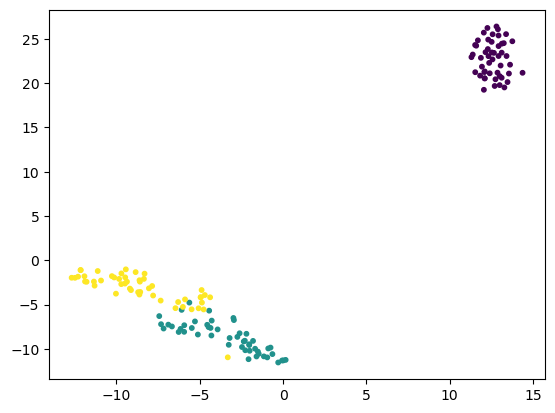

In [12]:
# t-SNE in sklearn

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

model = TSNE(learning_rate=100)

transformed = model.fit_transform(samples)

xs = transformed[:,0]
ys = transformed[:,1]

plt.scatter(xs, ys, c=species, s=10)
plt.show()

### About the t-SNE Learning Rate

* Choose learning rate for the dataset
* Wrong choice: points bunch together
* Try values between 50 and 200
* Is different every time (even for the same data)

### t-SNE Real-life Example: Stocks Dataset

In [13]:
# t-SNE visualization of stocks dataset

# Stocks data

data = pd.read_csv("datasets/company-stock-movements-2010-2015-incl.csv")
companies = list(data.iloc[:,0])
movements = data.iloc[:,1:].values

# Normalize

from sklearn.preprocessing import normalize
normalized_movements = normalize(movements)

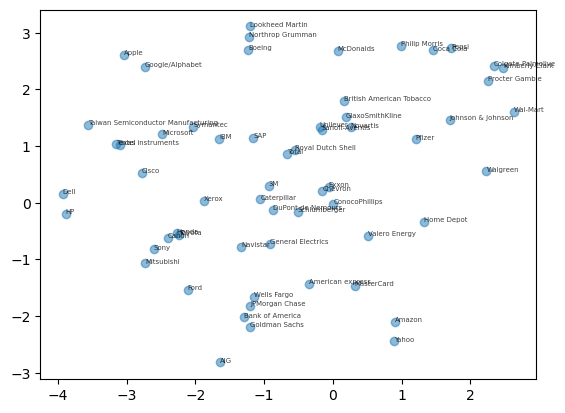

In [14]:
# A t-SNE map of the stock market

# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs,ys,alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
plt.show()